In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv('bank-full.csv', sep= ';')


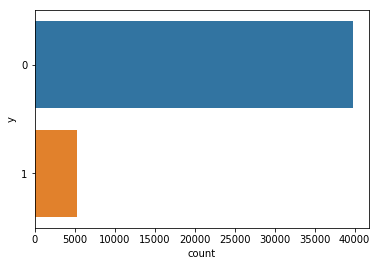

In [51]:
sns.countplot(y='y', data=df)

Lets create a class that help us to have an idea of the data we will work with:

In [3]:
class UnderstandingData:
    
    def __init__(self, raw_df):
        self.raw_df = raw_df
        self.raw_df_grouped = raw_df.groupby("y")
        self.class_name_no = "no"
        self.class_name_yes = "yes"
        self.raw_df_grouped_no = self.raw_df_grouped.get_group(self.class_name_no)
        self.raw_df_grouped_yes = self.raw_df_grouped.get_group(self.class_name_yes)

    def plot_histogram_continuous(self, feature_name, bin_size):
        plt.figure()
        plt.hist(self.raw_df_grouped_no[feature_name], bins=bin_size, label=self.class_name_no)
        plt.hist(self.raw_df_grouped_yes[feature_name], bins=bin_size, label=self.class_name_yes)
        plt.legend()
        plt.title("Feature Histogram - "+feature_name)
        plt.xlabel("Feature values")
        plt.ylabel("Count")

    def plot_histogram_categorical(self, feature_name):
        feature_df = pd.DataFrame()
        feature_df["no"] = self.raw_df_grouped_no[feature_name].value_counts()
        feature_df["yes"] = self.raw_df_grouped_yes[feature_name].value_counts()
        
        feature_df.plot(kind='bar')
        plt.title("Feature Histogram - "+feature_name)
        plt.ylabel("Count")
        plt.xlabel("Feature unique values")
        plt.tight_layout()

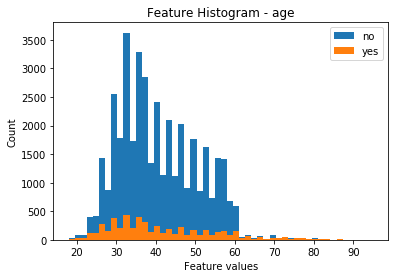

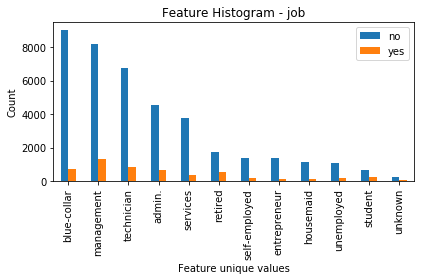

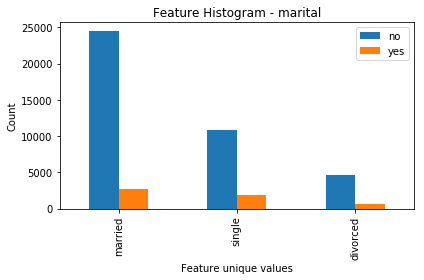

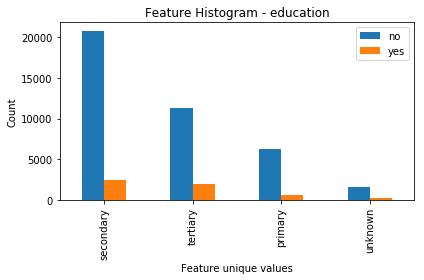

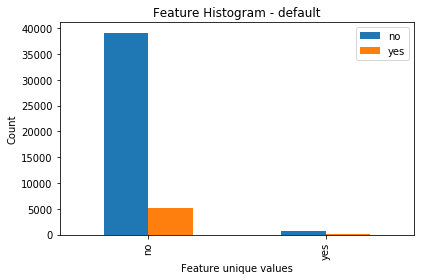

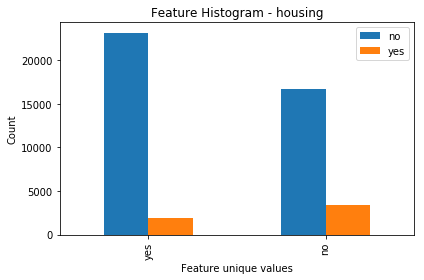

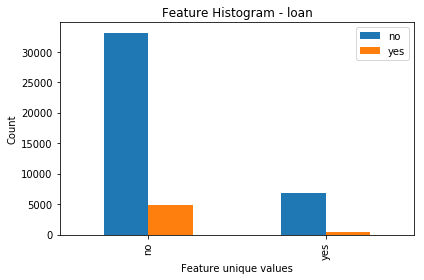

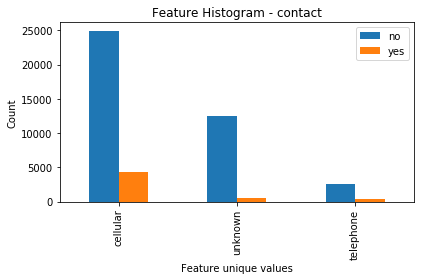

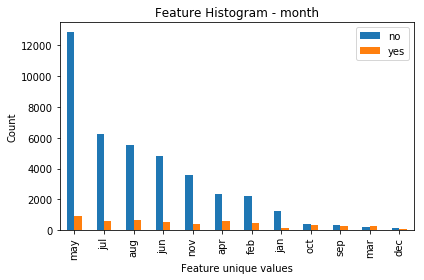

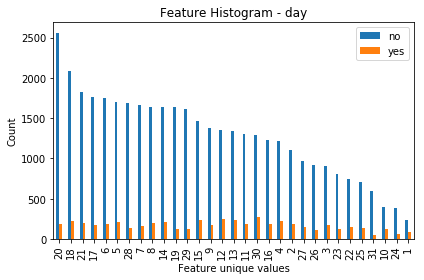

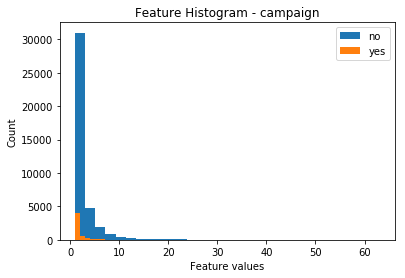

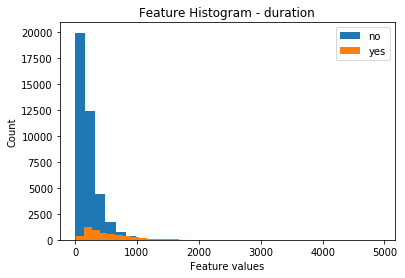

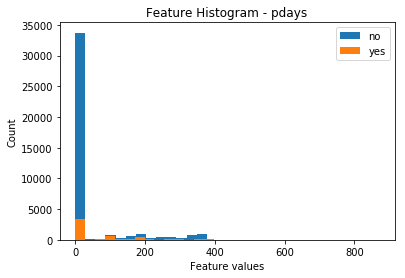

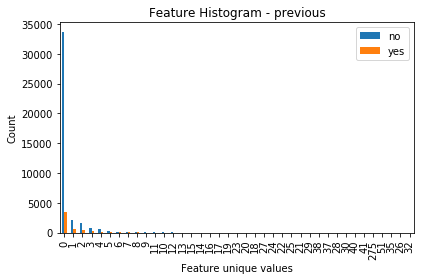

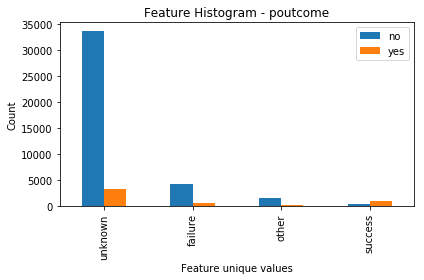

In [4]:

understanding_data = UnderstandingData(df)

### Feature 1 - AGE
understanding_data.plot_histogram_continuous("age", 50)

### Feature 2 - JOB
understanding_data.plot_histogram_categorical("job")

### Feature 3 - MARITAL
understanding_data.plot_histogram_categorical("marital")

### Feature 4 - EDUCATION
understanding_data.plot_histogram_categorical("education")

### Feature 5 - DEFAULT
understanding_data.plot_histogram_categorical("default")


### Feature 6 - BALANCE
#understanding_data.plot_histogram_categorical("balance")

### Feature 7 - HOUSING
understanding_data.plot_histogram_categorical("housing")

### Feature 8 - LOAN
understanding_data.plot_histogram_categorical("loan")

### Feature 9 - CONTACT
understanding_data.plot_histogram_categorical("contact")

### Feature 10 - MONTH
understanding_data.plot_histogram_categorical("month")

### Feature 11 - DAY OF WEEK
understanding_data.plot_histogram_categorical("day")

### Feature 12 - CAMPAIGN
understanding_data.plot_histogram_continuous("campaign", 30)

### Feature 13 - DURATION
understanding_data.plot_histogram_continuous("duration", 30)

### Feature 14 - PDAYS
understanding_data.plot_histogram_continuous("pdays", 30)

### Feature 15 - PREVIOUS
understanding_data.plot_histogram_categorical("previous")

### Feature 16 - POUTCOME
understanding_data.plot_histogram_categorical("poutcome")

A lot of things we can write down from the previous plots; for example, old persons ( > 60) as
young ones ( < 30) are the ones who requeires more the subscription as the yes/no ratio is the higeths ones.
lets see this with another plot:

In [5]:
count_job_y = pd.crosstab(df['y'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_y = count_job_y.transpose()

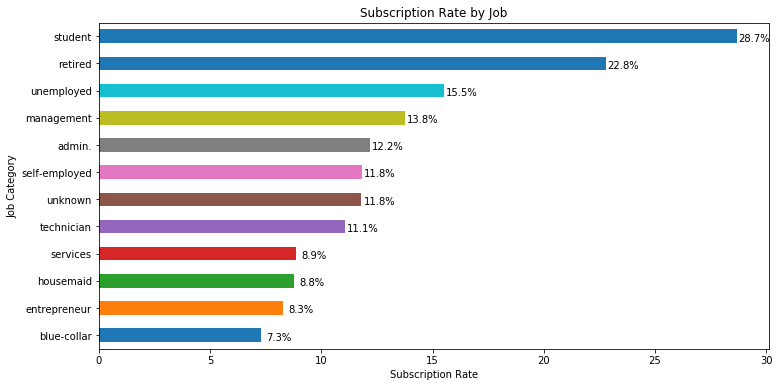

In [6]:
plot_job = count_job_y['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches, count_job_y['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center', va='bottom')

Then, just to answer the first question, as we suspected, the students and retired group of persons are the ones more likely take the subscription.

For the second question, it is clear from the histogram of campaign that as the number of contacts grows the probability to have more clients grows up with it. 

Now, lets examine the third question. Firs of all, lets work with the time in minutes instead of seconds:

In [7]:
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

Now, it is obvious that quick calls (< 5 seg) are not subscriptions:

In [8]:
# Step 1: Drop rows that 'duration' < 5s
condition1 = (df['duration']<5/60)
df = df.drop(df[condition1].index, axis = 0, inplace = False)

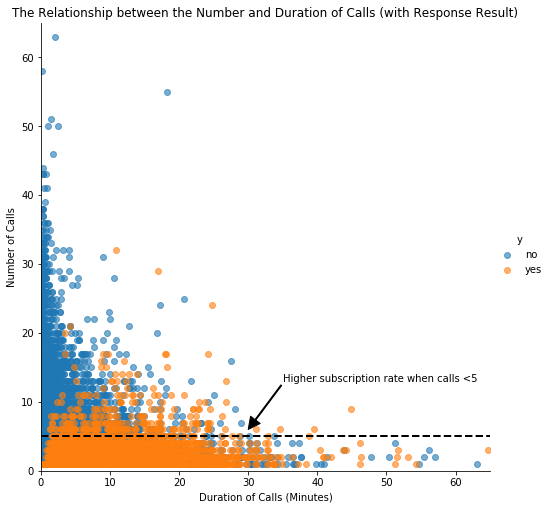

In [9]:
import seaborn as sns
dur_cam = sns.lmplot(x='duration', y='campaign',data = df,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

Therefore, as we can see from the plot, “yes” clients and “no” clients are forming two relatively separate clusters. Compared to “no” clients”, “yes” clients were contacted by fewer times and had longer call duration. More importantly, after five campaign calls, clients are more likely to reject the term deposit unless the duration is high. Most “yes” clients were approached by less than 10 times.
This suggests that the bank should resist calling a client for more than five times, which can be disturbing and increase dissatisfaction.

For the question 4: Yes, it is clear from the plots above that the yes/no ratio of the sucsess from the last campaign 
is the only one larger than 1, then the previous campaign have clearaly an important impact.

The questions 5 and 6 are related to how the features are related to each other, lets see first how unbalanced is the 
data:

There are 'unknow' and 'other' values, lets put them as Nan:

In [11]:
df.replace('unknown',np.NaN,inplace=True)
df.replace('other',np.NaN,inplace=True)

In [12]:
df.replace('yes', 1,inplace=True)
df.replace('no',0,inplace=True)

In [13]:
# lets Change 'month' from words to numbers for easier analysis
lst = [df]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

In [14]:
df = df.drop('month', axis=1)

In [15]:
df = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'month_int', 'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']]


In [16]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,month_int,day,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,NaN,5.0,5,4.35,1,-1,0,NaN,0
1,44,technician,single,secondary,0,29,1,0,NaN,5.0,5,2.52,1,-1,0,NaN,0
2,33,entrepreneur,married,secondary,0,2,1,1,NaN,5.0,5,1.27,1,-1,0,NaN,0
3,47,blue-collar,married,NaN,0,1506,1,0,NaN,5.0,5,1.53,1,-1,0,NaN,0
4,33,NaN,single,NaN,0,1,0,0,NaN,5.0,5,3.30,1,-1,0,NaN,0


In [17]:
df1 = df.dropna()

In [18]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,month_int,day,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,0,882,0,0,telephone,10.0,21,0.65,1,151,3,failure,0
24064,33,services,married,secondary,0,3444,1,0,telephone,10.0,21,2.40,1,91,4,failure,1
24077,36,management,married,tertiary,0,0,1,0,telephone,10.0,23,2.33,1,143,3,failure,1
24127,51,admin.,single,secondary,0,3132,0,0,telephone,11.0,5,7.48,1,176,1,failure,0
24151,33,unemployed,divorced,secondary,0,1005,1,0,telephone,11.0,10,2.92,1,174,2,failure,0


The contact way is irrelevant:

In [19]:
df2 = df1.drop('contact', axis=1)

Now our dataset is more clean, lets examine the feature balance, that we expect has an important relevance 
for the banck:

In [20]:
lst = [df2]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'

In [21]:
count_balance_response_pct = pd.crosstab(df2['y'],df2['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

In [22]:
bal = pd.DataFrame(df2['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct[1]
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

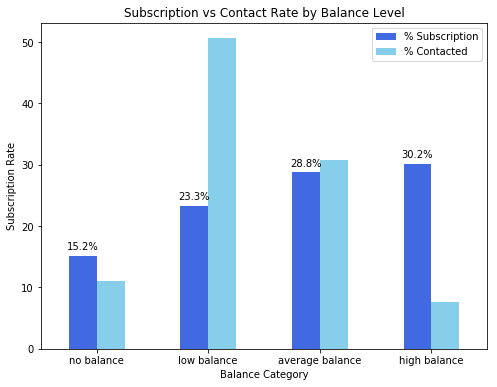

In [23]:
plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('royalblue','skyblue'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

Therefore, persons with high balance are more likely to subscribe.

We can have a naive idea on how the features are correlated to each other by plot the corr-matrix:

In [25]:
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,default,balance,housing,loan,month_int,day,duration,campaign,pdays,previous,y
age,1,-0.0289291,0.0966406,-0.191311,-0.0102938,0.0395033,0.0126236,0.0660772,0.00522798,-0.0874966,0.0133619,0.0648833
default,-0.0289291,1,-0.0451797,0.0213612,0.0564381,-0.010107,-0.00420953,-0.0236271,-0.00540197,0.0293824,0.0141024,-0.0370014
balance,0.0966406,-0.0451797,1,-0.101932,-0.0868325,0.0979747,0.0379225,0.0356538,0.0119463,-0.115222,-0.00699519,0.0681823
housing,-0.191311,0.0213612,-0.101932,1,0.117325,-0.170028,-0.0774309,-0.06229,0.0515521,0.347018,-0.00070981,-0.328596
loan,-0.0102938,0.0564381,-0.0868325,0.117325,1,-0.0317698,0.0155985,-0.0331602,0.0106222,0.0329456,0.00700958,-0.120623
month_int,0.0395033,-0.010107,0.0979747,-0.170028,-0.0317698,1,0.0942696,0.0053835,-0.0241554,-0.254718,0.0041384,0.107551
day,0.0126236,-0.00420953,0.0379225,-0.0774309,0.0155985,0.0942696,1,-0.0197971,-0.00697545,-0.0894827,-0.000546939,0.0144087
duration,0.0660772,-0.0236271,0.0356538,-0.06229,-0.0331602,0.0053835,-0.0197971,1,-0.0587172,-0.00824458,0.00809581,0.346545
campaign,0.00522798,-0.00540197,0.0119463,0.0515521,0.0106222,-0.0241554,-0.00697545,-0.0587172,1,0.0541994,0.177484,-0.0854904
pdays,-0.0874966,0.0293824,-0.115222,0.347018,0.0329456,-0.254718,-0.0894827,-0.00824458,0.0541994,1,-0.0535609,-0.170553


In [39]:
d1 = df2.drop('balance_group', axis=1)

In [40]:
d1.head()

,age,job,marital,education,default,balance,housing,loan,month_int,day,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,0,882,0,0,10.0,21,0.65,1,151,3,failure,0
24064,33,services,married,secondary,0,3444,1,0,10.0,21,2.40,1,91,4,failure,1
24077,36,management,married,tertiary,0,0,1,0,10.0,23,2.33,1,143,3,failure,1
24127,51,admin.,single,secondary,0,3132,0,0,11.0,5,7.48,1,176,1,failure,0
24151,33,unemployed,divorced,secondary,0,1005,1,0,11.0,10,2.92,1,174,2,failure,0


In [47]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
d1.job = le.fit_transform(d1.job)
d1.marital = le.fit_transform(d1.marital)
d1.education = le.fit_transform(d1.education)
d1.balance = le.fit_transform(d1.balance)
d1.default = le.fit_transform(d1.default)
d1.housing = le.fit_transform(d1.housing)
d1.loan = le.fit_transform(d1.loan)
d1.poutcome = le.fit_transform(d1.poutcome)
d1.y = le.fit_transform(d1.y)
d1.head()

,age,job,marital,education,default,balance,housing,loan,month_int,day,duration,campaign,pdays,previous,poutcome,y
24060,33,0,1,2,0,1048,0,0,10.0,21,0.65,1,151,3,0,0
24064,33,7,1,1,0,2077,1,0,10.0,21,2.40,1,91,4,0,1
24077,36,4,1,2,0,260,1,0,10.0,23,2.33,1,143,3,0,1
24127,51,0,2,1,0,2002,0,0,11.0,5,7.48,1,176,1,0,0
24151,33,10,0,1,0,1130,1,0,11.0,10,2.92,1,174,2,0,0


We can study the impact of the features in futures outcomes of the back on the pursuit of 
new subscriptions:

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [49]:
X = d1.iloc[:,0:15]  #independent columns
y = d1.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features

        Specs         Score
5     balance  30292.992887
12      pdays   9730.129847
10   duration   2504.165017
14   poutcome   1224.272512
6     housing    248.127401
8   month_int    113.667564
1         job    106.145558
0         age     80.296555
7        loan     76.503270
11   campaign     46.785000
3   education     27.252969
13   previous     24.476147
4     default      8.283066
2     marital      7.344801
9         day      5.414837


another way:

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[0.06623395 0.05491328 0.02746939 0.0246411  0.00089264 0.06877979
 0.04881562 0.01226769 0.08099983 0.07397609 0.15075934 0.04418249
 0.09787696 0.05583449 0.19235733]


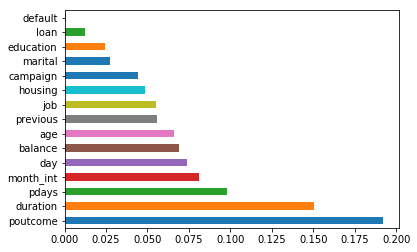

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

We can conclude, for instance, that age (<30 and > 60), job (student and retired) and balance
are the most representative features of the client. However, external to the client, features like 
duration of the call, pdays and the result of the last campaign are representative as well. 

There are "strange" features that appears to be relevants, like the 'month' and day features. We will have to 
look for more accurate ways to see how this features are relevant. For example, we can work with dummy variables
and then see how it behaves. 

Some remarks: We have worked with a very unbalanced data with high amount of missing data. It is 
know that algorithms like XgBoost can deal with this kind of data, so in order to move forward and
make a more exaustive analysis we will first try this kind of algorithms. On the other hand, we can 
balance the data by multiplication. Unfortunately I did not have the time to work properly on this
interesting dataset, I was aborad in a conferece and working on it on my free time,
I did my best with the short time I had.